# 🧾 Project Objective  
* Gain a clear understanding of:
  * Sales patterns  
  * Customer behavior  
  * Product performance  
* Identify key:
  * Trends  
  * Relationships  
  * Anomalies  
* Use insights to inform business strategies  

# 📊 Data Columns  

## *Original Columns*  
* `InvoiceNo`  
* `StockCode`  
* `Description`  
* `Quantity`  
* `InvoiceDate`  
* `UnitPrice`  
* `CustomerID`  
* `Country`  `  


# Univariate Analysis

## Invoice No

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("/Users/anuragchaubey/Online-Retail-Dashboard/data/Online_Retail_Cleaned.csv")

/var/folders/wz/4tdnltpd0j50hb4mv_kk_0140000gn/T/ipykernel_1259/2699271491.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/anuragchaubey/Online-Retail-Dashboard/data/Online_Retail_Cleaned.csv")


Total Unique Invoices: 20631
Overall Cancellation Rate: 0.00%


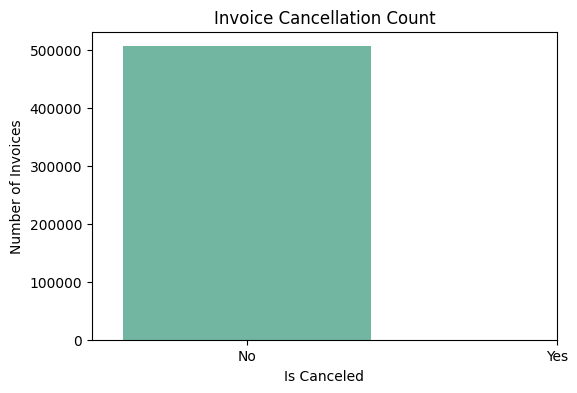

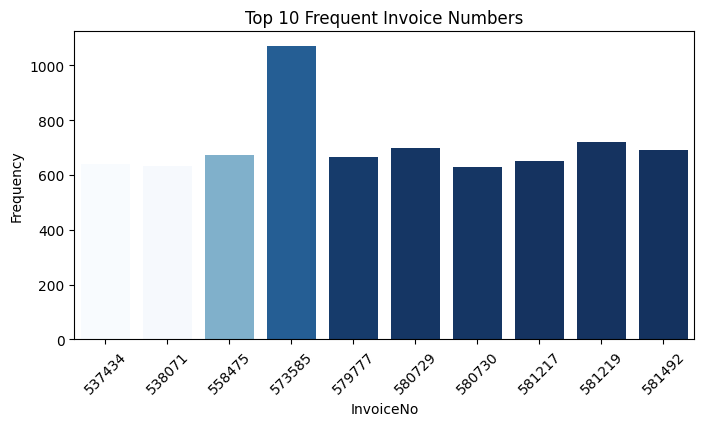

In [27]:
# Load your dataset

# Derive IsCanceled column (assuming cancellations have InvoiceNo starting with 'C')
df['IsCanceled'] = df['InvoiceNo'].astype(str).str.startswith('C')

# 1. Total number of unique transactions
unique_invoices = df['InvoiceNo'].nunique()
print(f"Total Unique Invoices: {unique_invoices}")

# 2. Overall cancellation rate
cancellation_rate = df['IsCanceled'].mean()
print(f"Overall Cancellation Rate: {cancellation_rate:.2%}")

# 3. Bar plot: Count of canceled vs non-canceled
plt.figure(figsize=(6,4))
sns.countplot(x='IsCanceled',legend=False,hue='IsCanceled', data=df, palette='Set2')
plt.title("Invoice Cancellation Count")
plt.xlabel("Is Canceled")
plt.ylabel("Number of Invoices")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 4. (Optional) Bar plot of Top 10 InvoiceNo frequency (to spot any repetition/anomaly)
top_invoice_freq = df['InvoiceNo'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_invoice_freq.index, y=top_invoice_freq.values,legend=False,hue=top_invoice_freq.index, palette='Blues')
plt.title("Top 10 Frequent Invoice Numbers")
plt.xlabel("InvoiceNo")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


## 📊 Key Insights

### 🔟 Top 10 Invoice Numbers
* **573585** is the most frequent (>1000 times) — likely bulk order or recurring billing  
* Others range ~600–700 — shows moderate repeat activity  
* Gradient color in bars shows frequency (darker = more)  

### 🚫 Invoice Cancellations
* **Very few or none canceled** — "No" > 500,000, "Yes" nearly 0  
* Indicates stable, reliable order system  

### 💡 Overall
* Business runs with high volume & low failure  
* 573585 could reveal key products or clients  
* Patterns help improve marketing & operations  


## StockCode

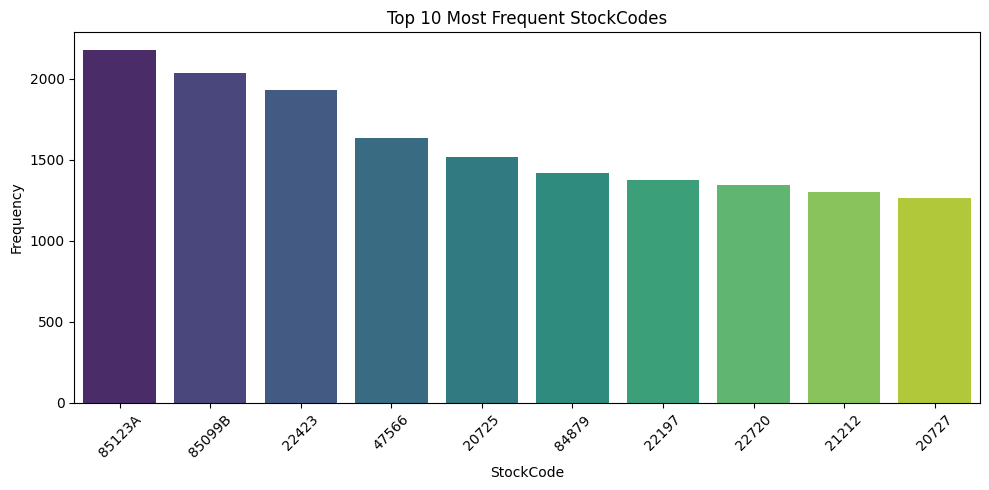

In [28]:
# Top N StockCodes by frequency
top_n = 10
top_stockcodes = df['StockCode'].value_counts().head(top_n)

# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=top_stockcodes.index, y=top_stockcodes.values,hue=top_stockcodes.index, palette="viridis")
plt.title(f"Top {top_n} Most Frequent StockCodes")
plt.xlabel("StockCode")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🧾 Top 10 Frequent StockCodes – Insights

* **'85123A' leads** with 2000+ sales — highly popular item  
* **Smooth decline** in frequency from top to 10th ('20727' ~1200)  
* Shows **consistent demand** across top products  
* Inventory focus needed on top codes:  
  * '85123A', '85099B', '22423' → likely high-demand  
* **Color gradient** (purple → yellow) shows frequency visually  


## Description

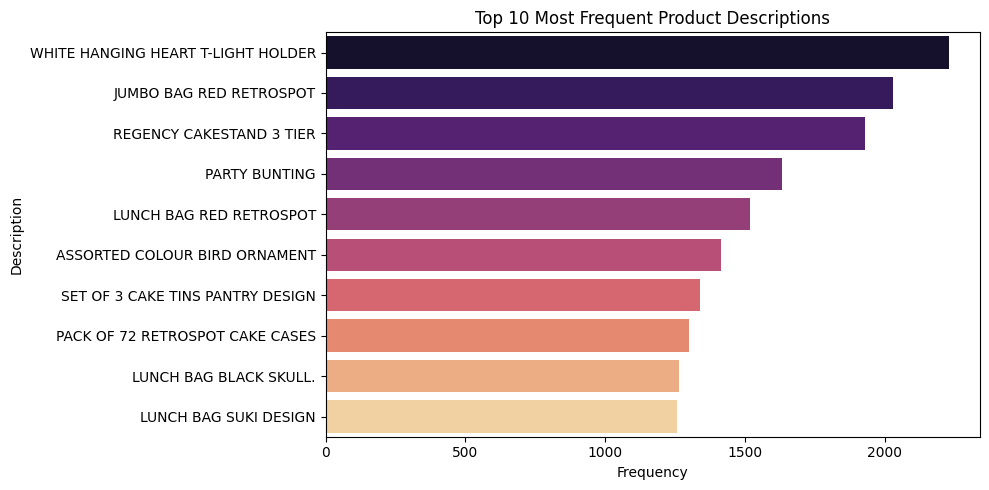

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Bar Chart: Top N Descriptions
top_n = 10
top_descriptions = df['Description'].value_counts().head(top_n)

plt.figure(figsize=(10,5))
sns.barplot(x=top_descriptions.values, y=top_descriptions.index,hue= top_descriptions.index,palette='magma')
plt.title(f"Top {top_n} Most Frequent Product Descriptions")
plt.xlabel("Frequency")
plt.ylabel("Description")
plt.tight_layout()
plt.show()


### 🛍️ Top 10 Product Descriptions – Insights

* **Most frequent:** 'WHITE HANGING HEART T-LIGHT HOLDER' (2000+ times)  
* **Close behind:** 'JUMBO BAG RED RETROSPOT' (~2000), 'REGENCY CAKESTAND 3 TIER' (~1900)  
* **"RETROSPOT" theme dominates** — appears in multiple top products  
* **Lunch bags** are consistently popular across various designs  
* Mix of **decorative, practical, and party items** shows diverse demand  
* Frequencies decline steadily down to ~1200 (10th item)  
* **Color gradient** (purple → yellow) shows popularity visually  


## Quantity

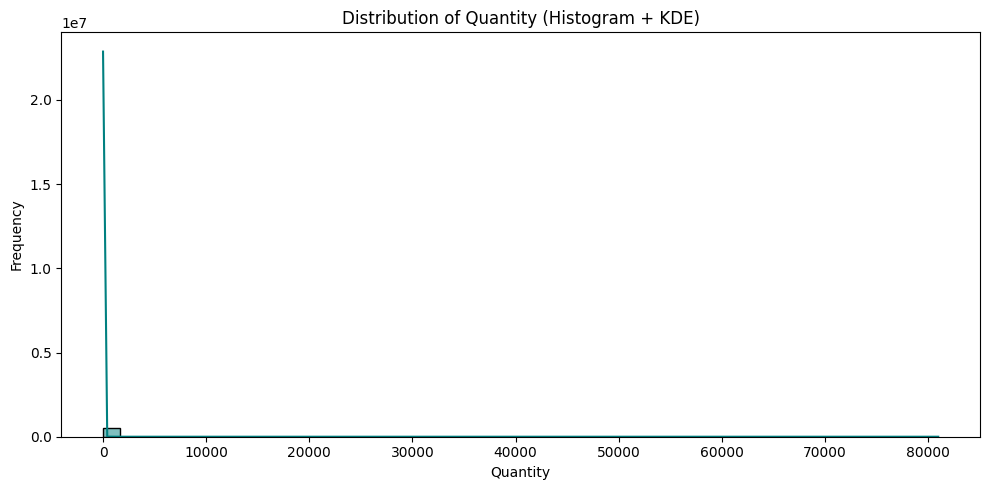

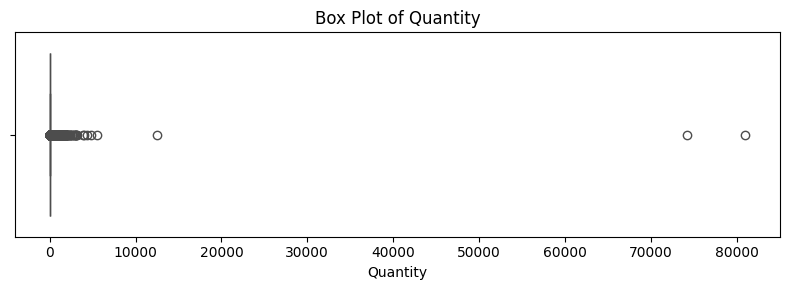

In [30]:
# 1. Histogram with KDE for Quantity
plt.figure(figsize=(10,5))
sns.histplot(df['Quantity'], kde=True, bins=50, color='teal')
plt.title("Distribution of Quantity (Histogram + KDE)")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Box Plot for Quantity
plt.figure(figsize=(8,3))
sns.boxplot(x=df['Quantity'], color='orange')
plt.title("Box Plot of Quantity")
plt.xlabel("Quantity")
plt.tight_layout()
plt.show()


## 📦 Quantity Distribution – Histogram + KDE

* **Right-skewed distribution** — most quantities near zero  
* **Peak at small values** (mostly 1–3 units), freq ~20 million  
* **Long tail up to 80,000+** — rare large orders  
* Implies:
  * Most sales = small orders  
  * Large values = outliers or special cases  
* **Visualization challenge** — consider log scale or range-split  

---

## 📊 Quantity Distribution – Box Plot

* **Box is tightly packed near 0** — IQR is very small  
* **Outliers extend far right** (10,000–80,000+)  
* Confirms **heavy right-skew**  
* **Median, Q1, Q3 ≈ 0** — consistent with histogram  
* Highlights rare but extreme quantity values  


## InvoiceDate

In [31]:
# Convert to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create helper columns
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

# Create TotalPrice column for revenue plots
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


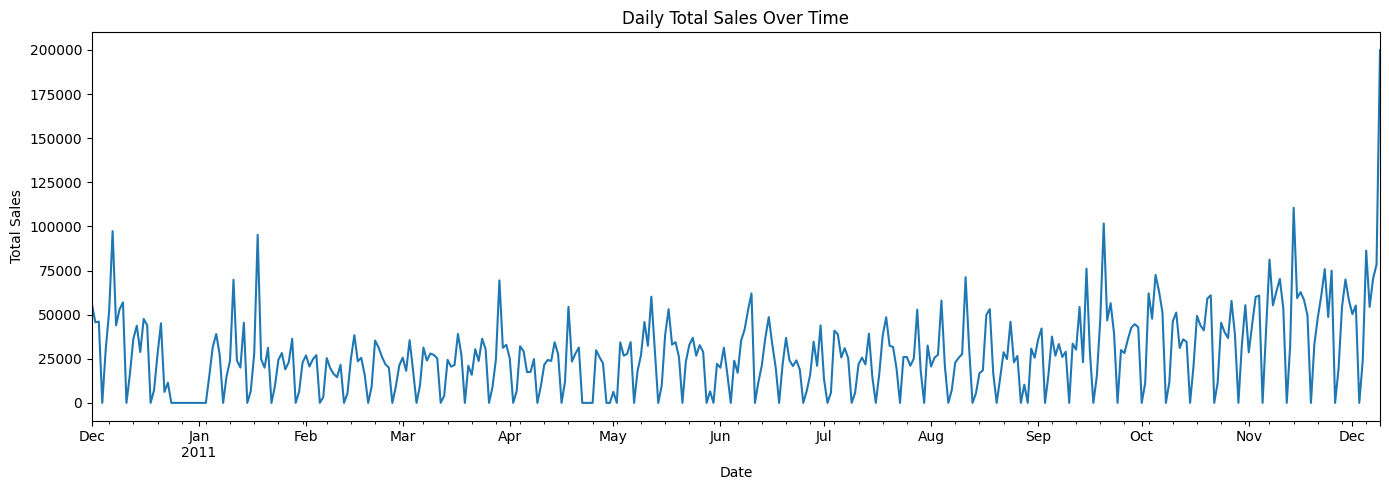

In [32]:
# Resample by day
daily_sales = df.resample('D', on='InvoiceDate')['TotalPrice'].sum()

plt.figure(figsize=(14,5))
daily_sales.plot()
plt.title("Daily Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


### 📅 Daily Sales – Summary

* **Peak:** Late Dec → $200K+ (seasonal spike)  
* **Low:** End Dec–Early Jan → near $0 (holiday/downtime)  
* **Trend:** Rises toward year-end  
* **Typical Days:** $25K–$50K (Feb–Oct)  
* **Pattern:** Fluctuating daily, clear seasonality  


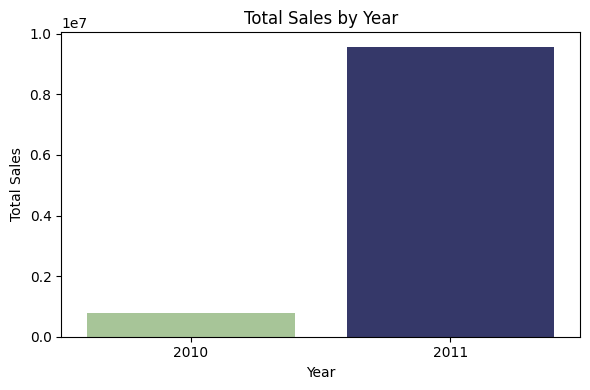

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x='InvoiceYear', y='TotalPrice',errorbar=None, data=df, estimator='sum', palette='crest',hue='InvoiceYear',legend=False)
plt.title("Total Sales by Year")
plt.ylabel("Total Sales")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


## 📊 Total Sales by Year

* **Massive growth** from 2010 to 2011  
* **2010:** ~$1M | **2011:** ~$9.5M  
* **2011 sales** ≈ 9–10× higher than 2010  


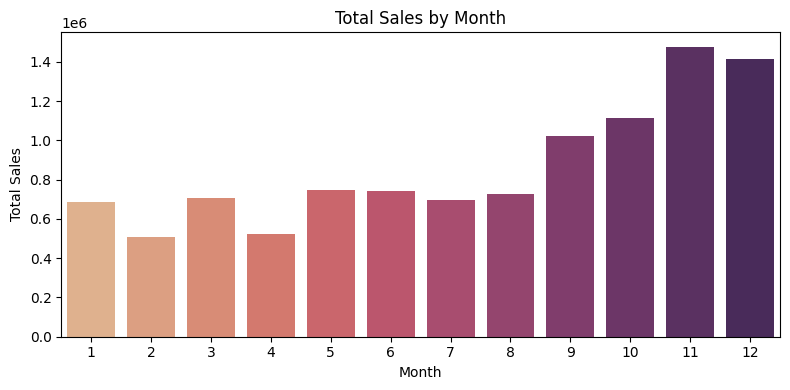

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(x='InvoiceMonth', y='TotalPrice', data=df, estimator='sum',errorbar=None,hue='InvoiceMonth',legend=False, palette='flare')
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


### 📅 Total Sales by Month

* 📈 **Rising trend** — peaks in Nov & Dec (> $1.4M)  
* 📉 **Low sales:** Feb & Apr (~$500K)  
* 📊 **Stable mid-year:** May–Aug (~$700K–750K)  
* 🔼 **Q4 surge:** Starts Sep, peaks in Nov  


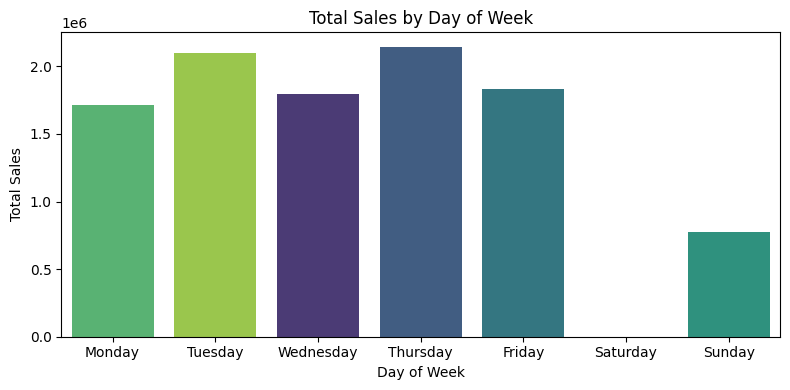

In [35]:
# Ensure weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8,4))
sns.barplot(x='InvoiceDayOfWeek', y='TotalPrice', data=df, estimator='sum', errorbar=None, hue='InvoiceDayOfWeek', legend=False,
            order=day_order, palette='viridis')
plt.title("Total Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


### 📆 Sales by Day of Week

* 🚫 **No sales on Saturday**, very low on Sunday (~$750K)  
* 🔼 **Peak:** Thursday, then Tuesday  
* 📈 **Weekday sales (Mon–Fri):** Consistent, all > $1.75M  
* 🏢 Likely closed or limited ops on weekends  


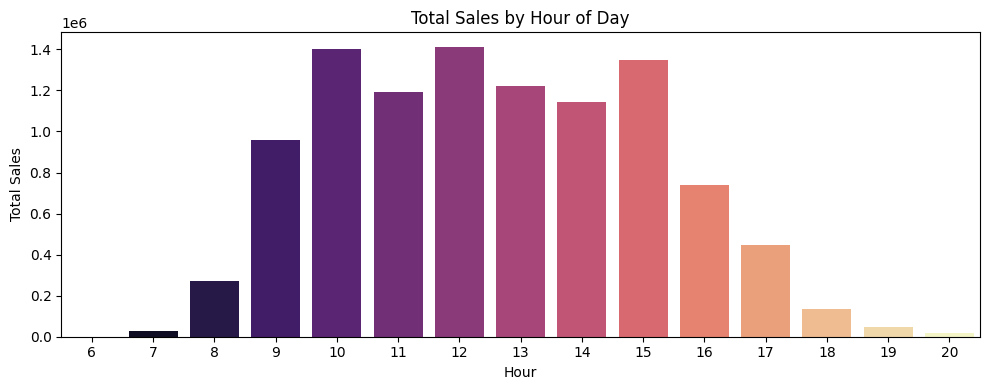

In [36]:
plt.figure(figsize=(10,4))
sns.barplot(x='InvoiceHour', y='TotalPrice', data=df, estimator='sum', errorbar=None ,hue='InvoiceHour',legend=False, palette='magma')
plt.title("Total Sales by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


### 🕒 Sales by Hour of Day

* 🕖 **Sales occur 7 AM – 8 PM**  
* 🔼 **Peak hours:** 10 AM & 12 PM (> $1.4M)  
* 🥪 **Lunchtime spike:** 12–1 PM  
* 📈 Ramp-up: 7–10 AM 📉 Decline: 3–8 PM  
* 💤 Very low sales at 7–8 AM & PM  


## UnitPrice

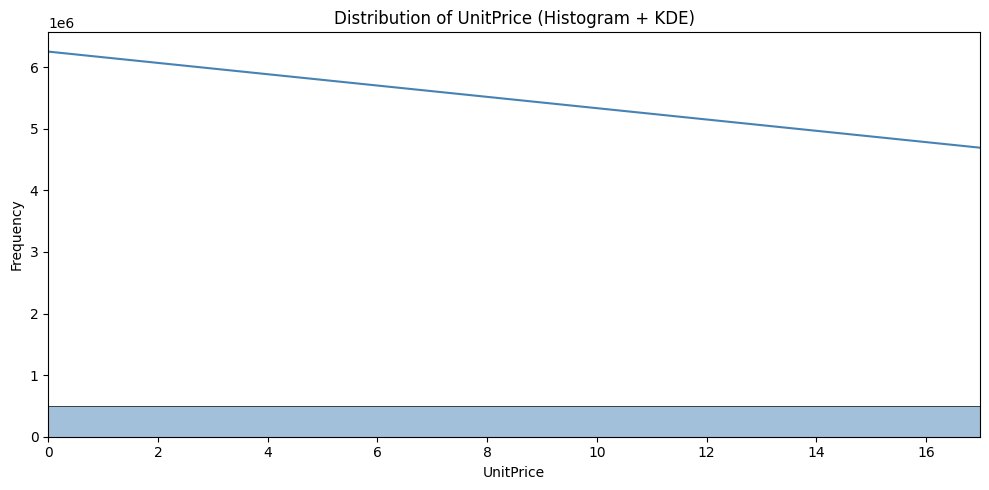

In [37]:
# 1. Histogram with KDE for UnitPrice
plt.figure(figsize=(10,5))
sns.histplot(df['UnitPrice'], kde=True, bins=100, color='steelblue')
plt.title("Distribution of UnitPrice (Histogram + KDE)")
plt.xlabel("UnitPrice")
plt.ylabel("Frequency")
plt.xlim(0, df['UnitPrice'].quantile(0.99))  # focus on 99% data to avoid distortion
plt.tight_layout()
plt.show()


### 💲 UnitPrice Distribution

* 📈 **Heavily right-skewed** — most prices near **0**  
* 🔹 **Low-priced items dominate** (> 6M freq at UnitPrice = 0)  
* 🔻 **KDE confirms sharp drop** as price increases  
* 💰 **High-priced items** (e.g., UnitPrice = 17) are **rare**  
* Shows strong bias toward low-cost products  


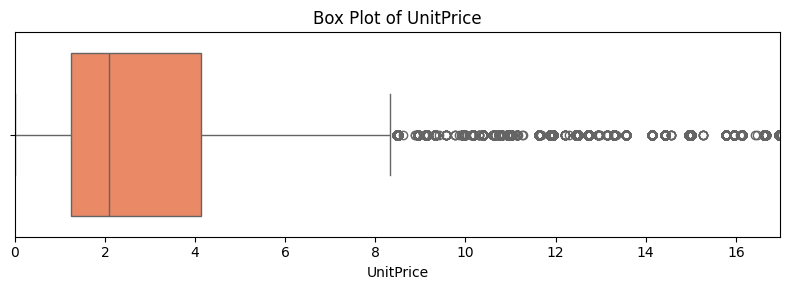

In [38]:
# 2. Box Plot for UnitPrice
plt.figure(figsize=(8,3))
sns.boxplot(x=df['UnitPrice'], color='coral')
plt.title("Box Plot of UnitPrice")
plt.xlabel("UnitPrice")
plt.xlim(0, df['UnitPrice'].quantile(0.99))  # zoom in to avoid extreme outliers
plt.tight_layout()
plt.show()


### 📦 Box Plot – UnitPrice

* 🔹 **Median ≈ 2**  
* 📊 **IQR:** ~1.5 to 4 → tightly packed low prices  
* 📈 **Right-skewed:** Long right whisker, short left  
* ⚠️ **Outliers:** Start ~8, extend beyond 16  
* 📉 **Low prices dominate**, high prices rare but present  


## CustomerID

In [39]:
# Calculate spend per customer
spend_per_customer = df.groupby('CustomerID')['TotalPrice'].sum()
print(f"Top 5 customers by spend:\n{spend_per_customer.sort_values(ascending=False).head()}")

Top 5 customers by spend:
CustomerID
UNKNOWN_CUSTOMER    1805188.58
14646.0              270083.43
18102.0              246729.80
17450.0              183164.99
16446.0              168472.50
Name: TotalPrice, dtype: float64


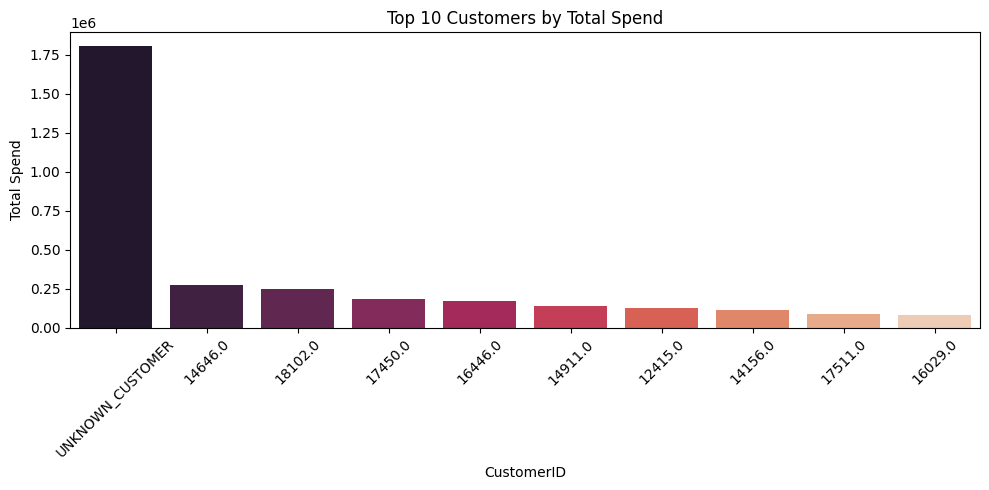

In [40]:
# 3. Top N Customers by Spend
top_n = 10
top_customers = spend_per_customer.sort_values(ascending=False).head(top_n)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='rocket',hue=top_customers.index, legend=False)
plt.title(f"Top {top_n} Customers by Total Spend")
plt.xlabel("CustomerID")
plt.ylabel("Total Spend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🧑‍💼 Top 10 Customers by Spend

* 🚨 **"UNKNOWN_CUSTOMER" dominates** (> $1.75M) — major data gap  
* 📉 **Next best (ID 14646.0):** ~$250K  
* ➡️ Others: Gradual drop to ~$100K (ID 16029.0)  
* ❓ **True top spender unclear** due to missing IDs  
* ⚠️ **Customer analysis skewed** — data quality issue must be fixed  


## Country

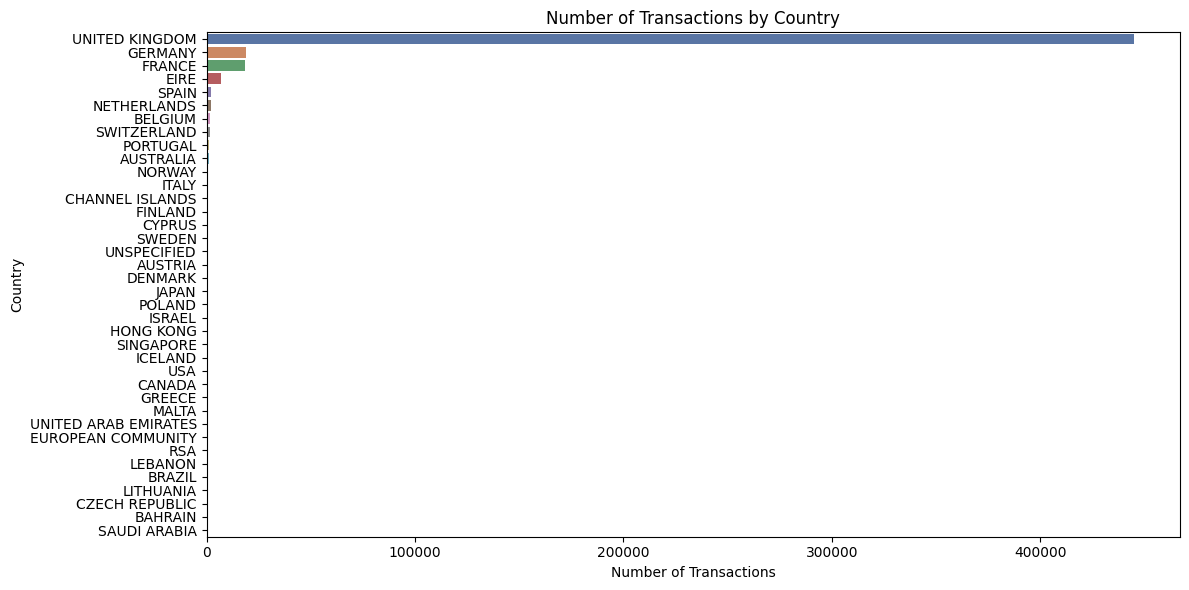

In [41]:
# 1. Bar Chart: Frequency of transactions by country
country_counts = df['Country'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(y=country_counts.index, x=country_counts.values, palette='deep',hue=country_counts.index, legend=False)
plt.title("Number of Transactions by Country")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


### 🌍 Transactions by Country

* 🇬🇧 **UK dominates** with 400K+ transactions  
* 🔽 Huge gap — **Germany** next with ~10K (<3% of UK)  
* 📉 Other top: France, EIRE, Spain — all < 50K  
* 🌐 Most countries: Very low volume (< 2K)  
* 📌 Suggests UK-based or UK-focused business  


## Total Price

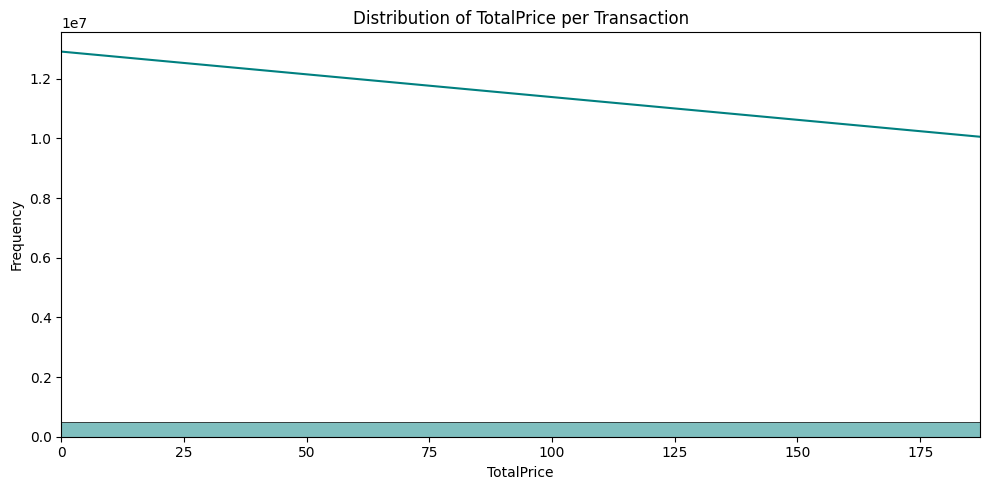

In [42]:
# If not already created
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 1. Histogram + KDE of TotalPrice
plt.figure(figsize=(10,5))
sns.histplot(df['TotalPrice'], bins=100, kde=True, color='teal')
plt.title("Distribution of TotalPrice per Transaction")
plt.xlabel("TotalPrice")
plt.ylabel("Frequency")
plt.xlim(0, df['TotalPrice'].quantile(0.99))  # Zoom into 99% to ignore extreme outliers
plt.tight_layout()
plt.show()


### 💰 TotalPrice per Transaction Distribution

* 📈 **Right-skewed** — Most transactions have very low `TotalPrice`  
* 🔢 **Peak near 0** — Over 1.25M transactions close to ₹0  
* 🟦 **Histogram + KDE** show steep drop as price increases  
* 🧾 **High-value transactions** are rare  
* 🔄 Similar to UnitPrice distribution — likely due to **low unit prices**, not low quantities  


# Bivariate Analysis

## 2.1. Numerical vs. Numerical Relationships

### Quantity vs. UnitPrice

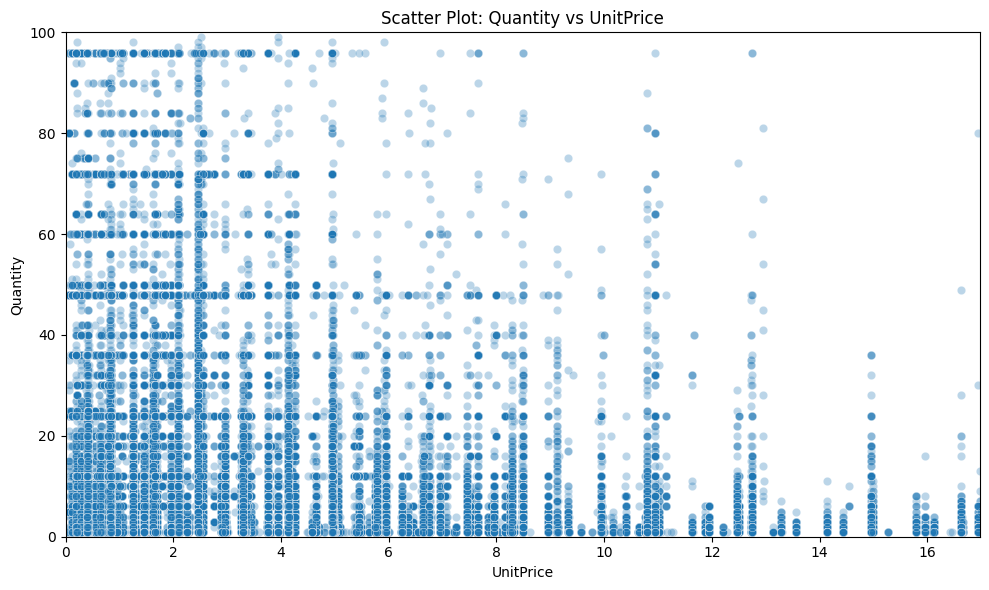

In [43]:
# Scatter plot (with outlier zoom-in for better clarity)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[df['Quantity'] < df['Quantity'].quantile(0.99)],
                x='UnitPrice', y='Quantity', alpha=0.3)
plt.title("Scatter Plot: Quantity vs UnitPrice")
plt.xlabel("UnitPrice")
plt.ylabel("Quantity")
plt.xlim(0, df['UnitPrice'].quantile(0.99))  # Zooming to avoid outliers
plt.ylim(0, df['Quantity'].quantile(0.99))
plt.tight_layout()
plt.show()


### 📊 Scatter Plot: Quantity vs UnitPrice

* 🔻 **Dense bottom-left** — Most transactions = low quantity + low unit price  
* 🔁 **Inverse trend** — Higher price → Lower quantity  
* 🧱 **Vertical stripes** — Fixed, repeated `UnitPrice` values (standard pricing)  
* 📦 **Horizontal lines** — Common `Quantity` values (e.g., 10, 12, 24) suggest pack sizes  
* 🔹 **Outliers rare** — Few transactions with high `Quantity` or high `UnitPrice`  
* 🔀 **No strong correlation** — Scatter forms a funnel shape, not a clear line  


### Quantity vs. TotalPrice

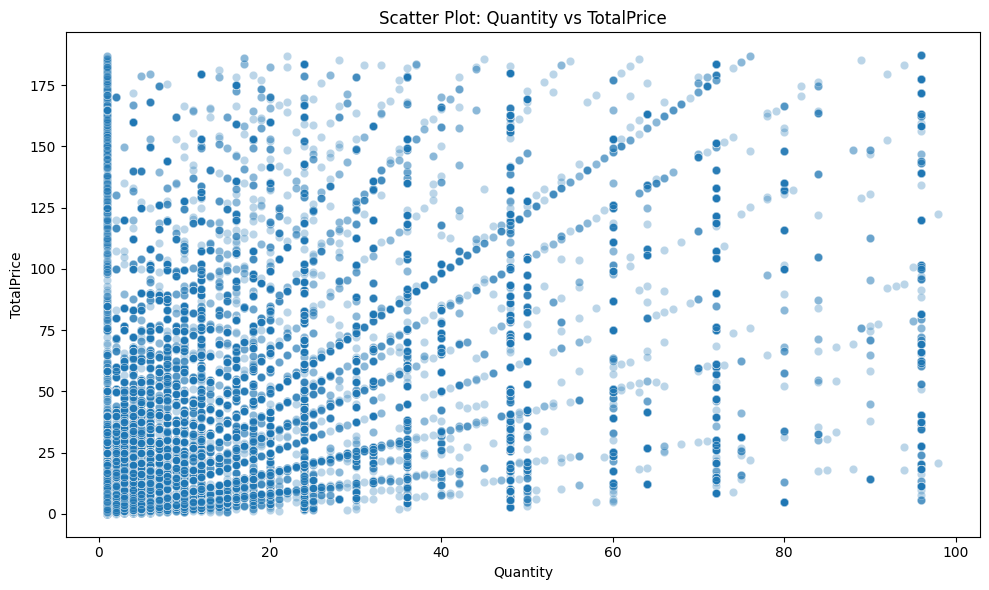

In [44]:
# Ensure TotalPrice column exists
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Scatter plot with zoom to remove outliers
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[(df['Quantity'] < df['Quantity'].quantile(0.99)) & 
                        (df['TotalPrice'] < df['TotalPrice'].quantile(0.99))],
                x='Quantity', y='TotalPrice', alpha=0.3)
plt.title("Scatter Plot: Quantity vs TotalPrice")
plt.xlabel("Quantity")
plt.ylabel("TotalPrice")
plt.tight_layout()
plt.show()


### 📊 Scatter Plot: Quantity vs TotalPrice

* 📈 **Strong positive trend** — More quantity → Higher total price  
* 🌟 **Fan-like pattern** — Lines from origin = different `UnitPrice` levels  
* 💰 **Fixed price points** — Limited, repeated unit prices (discrete slopes)  
* 🔻 **Dense bottom-left** — Most transactions = small quantity + low total price  
* 📉 **Sparse high-end** — Fewer transactions with large quantity & high total price  


### UnitPrice vs. TotalPrice

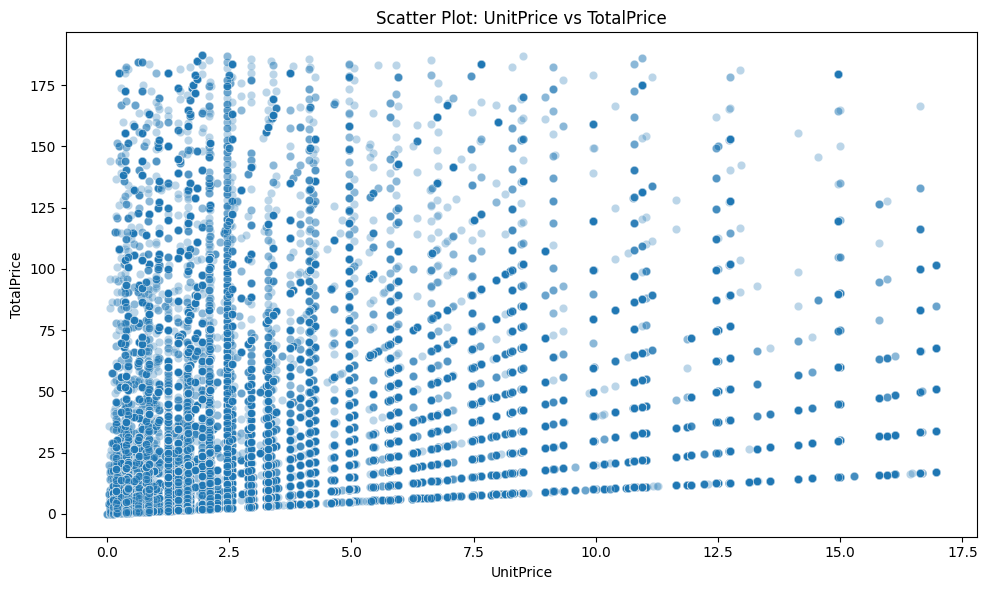

In [45]:
# Ensure TotalPrice column exists
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Scatter plot (zoom to 99% quantile to avoid outliers)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[(df['UnitPrice'] < df['UnitPrice'].quantile(0.99)) & 
                        (df['TotalPrice'] < df['TotalPrice'].quantile(0.99))],
                x='UnitPrice', y='TotalPrice', alpha=0.3)
plt.title("Scatter Plot: UnitPrice vs TotalPrice")
plt.xlabel("UnitPrice")
plt.ylabel("TotalPrice")
plt.tight_layout()
plt.show()


### 💸 Scatter Plot: UnitPrice vs TotalPrice

* 📈 **Strong positive trend** — Higher `UnitPrice` → Higher `TotalPrice`  
* 🌟 **Spoke pattern** — Lines from origin = fixed `Quantity` levels  
* 📦 **Discrete quantities** — Common pack sizes like 1, 2, 6, 12, etc.  
* 🔻 **Dense bottom-left** — Most sales = low unit price + low total price  
* 📉 **Rare high-end sales** — Fewer expensive & large transactions  
* 🔁 **Multiplicative insight** — Complements Quantity vs TotalPrice:  
  `TotalPrice = Quantity × UnitPrice`


## 2.2. Categorical vs. Numerical Relationships

### Country vs. TotalPrice

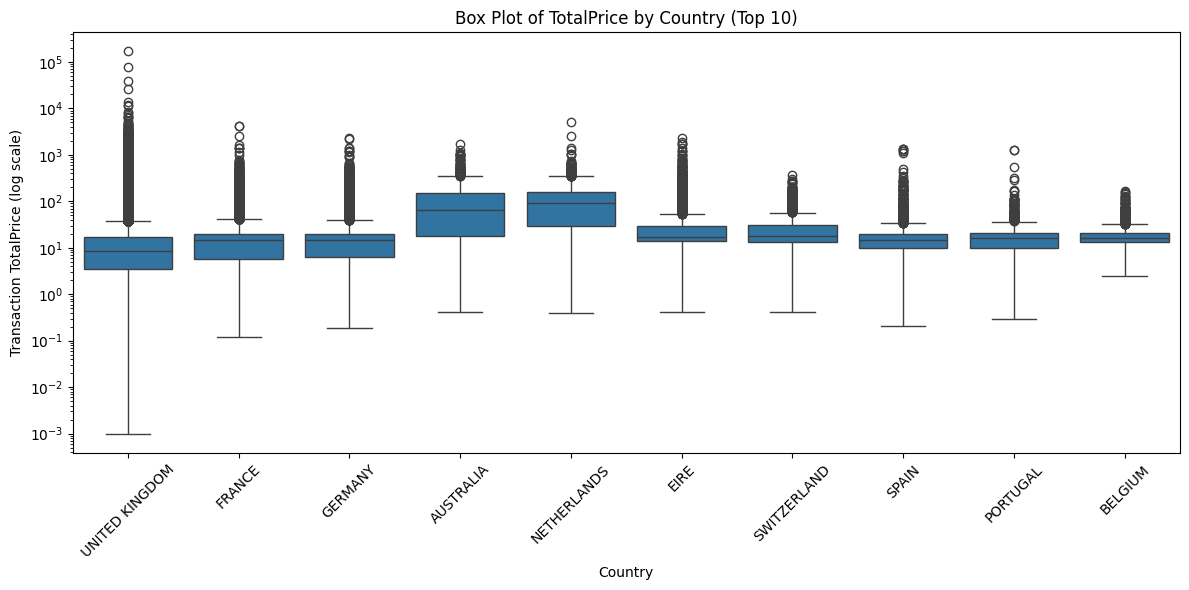

In [46]:
# Calculate TotalPrice if not already done
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Top 10 countries by number of transactions
top_countries = df['Country'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Country'].isin(top_countries)], 
            x='Country', y='TotalPrice')
plt.yscale('log')  # Handle outliers better
plt.title("Box Plot of TotalPrice by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Transaction TotalPrice (log scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📦 **Box Plot: TotalPrice by Country (Top 10)**

- **Log scale** used on y-axis  
- 🇬🇧 **UK**: Wide range, many high outliers (~100k)  
- 🇦🇺 & 🇳🇱: Highest median (~100), fewer outliers  
- 🇫🇷 🇩🇪 🇪🇸 🇵🇹: Lower medians (~10), fewer extremes  
- 🇧🇪: Very consistent, narrow range  
- All countries: Skewed with few high-value transactions


### Country vs. Quantity

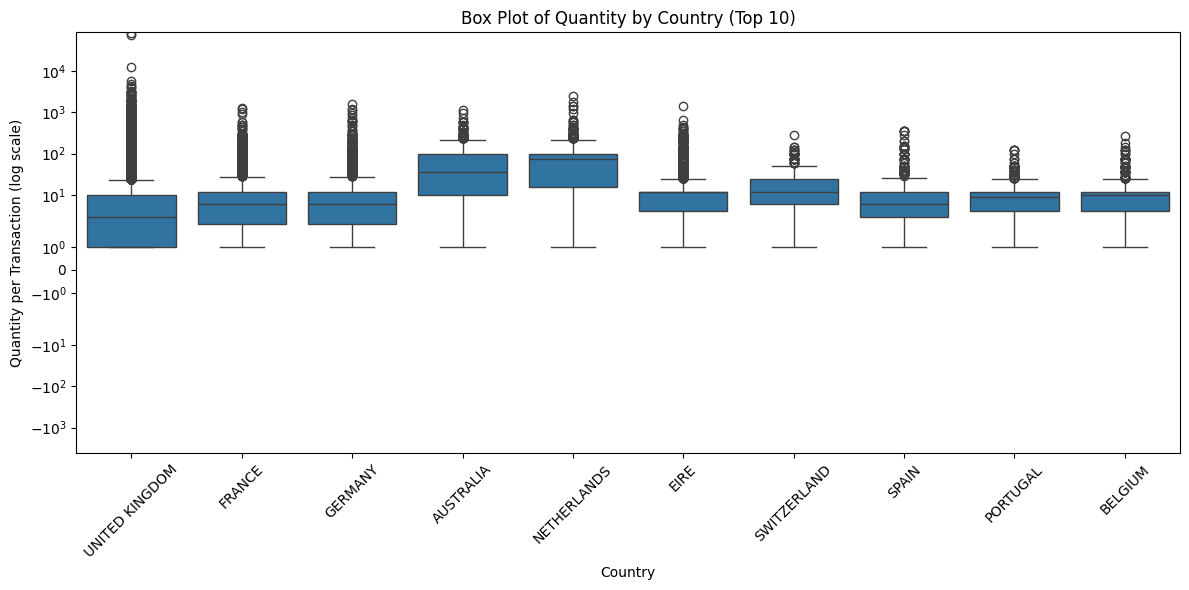

In [47]:
# Top 10 countries by transaction count
top_countries = df['Country'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Country'].isin(top_countries)], 
            x='Country', y='Quantity')
plt.yscale('symlog')  # Log scale handles outliers and negative quantities
plt.title("Box Plot of Quantity by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Quantity per Transaction (log scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📦 **Box Plot: Quantity by Country (Top 10)**

- **Log scale** on y-axis; some values appear negative due to anomalies
- 🇦🇺 & 🇳🇱: Highest median quantity (>10 items/transaction)
- 🇬🇧 🇩🇪 🇫🇷 🇪🇸 🇵🇹 etc.: Median quantity ~1–10
- 🇬🇧: Huge number of outliers (bulk purchases in 1000s+)
- 🇩🇪 🇫🇷 🇳🇱: Some outliers, but far fewer than UK
- All countries show **upward skew**, i.e., most transactions are small, with few very large ones
- Matches **TotalPrice** trends: higher quantity → higher total price in 🇦🇺 & 🇳🇱


### IsCanceled vs. Quantity / TotalPrice

In [48]:
# Ensure TotalPrice exists
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


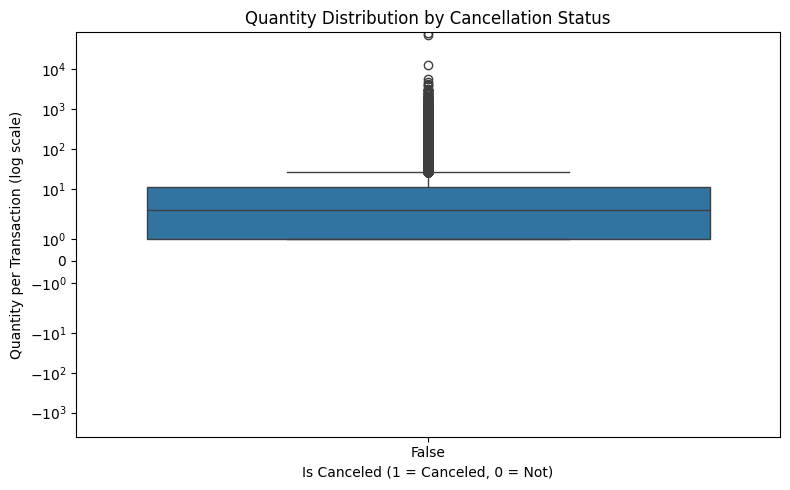

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='IsCanceled', y='Quantity')
plt.yscale('symlog')  # for handling outliers/returns
plt.title("Quantity Distribution by Cancellation Status")
plt.xlabel("Is Canceled (1 = Canceled, 0 = Not)")
plt.ylabel("Quantity per Transaction (log scale)")
plt.tight_layout()
plt.show()


📦 **Box Plot: Quantity by Cancellation Status**

- **Only shows non-cancelled (Is Canceled = False)** transactions
- **Log scale** on y-axis (Quantity per Transaction)
- **Median quantity ≈ 10** items
- **IQR:** 50% of transactions are between **1 and 10** items
- **Upward skew**: Most orders are small, but some bulk purchases go up to **10,000+**
- ⚠️ **No data for canceled orders** — so we can't compare both categories


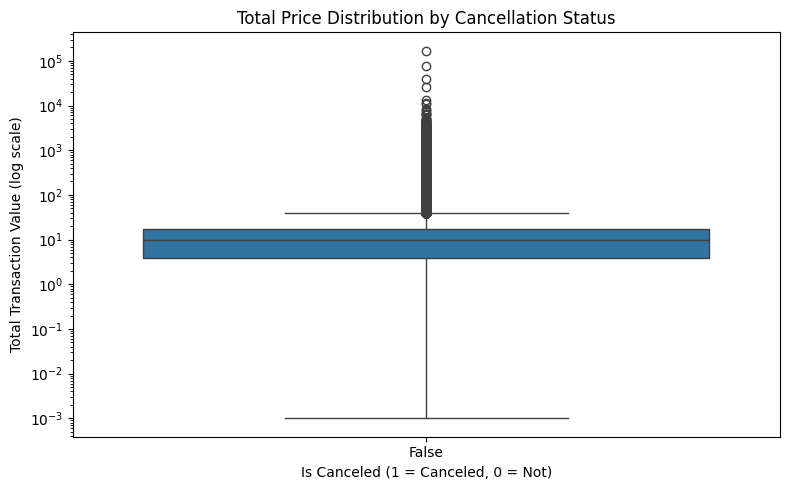

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='IsCanceled', y='TotalPrice')
plt.yscale('log')  # helps in handling wide price ranges
plt.title("Total Price Distribution by Cancellation Status")
plt.xlabel("Is Canceled (1 = Canceled, 0 = Not)")
plt.ylabel("Total Transaction Value (log scale)")
plt.tight_layout()
plt.show()


💰 **Box Plot: Total Price by Cancellation Status**

- Only shows **non-cancelled** (Is Canceled = False) transactions
- Y-axis uses a **log scale** for `TotalPrice`
- **Median ≈ $10**, with most values between **$1 and $20**
- **Skewed upward**: few transactions go up to **$100,000+**
- Similar pattern as quantity plot → small typical transactions + rare high-value ones
- ⚠️ **No data for cancelled orders**, so comparison isn’t possible


### Month (Derived) vs. TotalPrice / Quantity

In [51]:
# Convert InvoiceDate to datetime (if not already done)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Month as integer and optionally Month name
df['Month'] = df['InvoiceDate'].dt.month


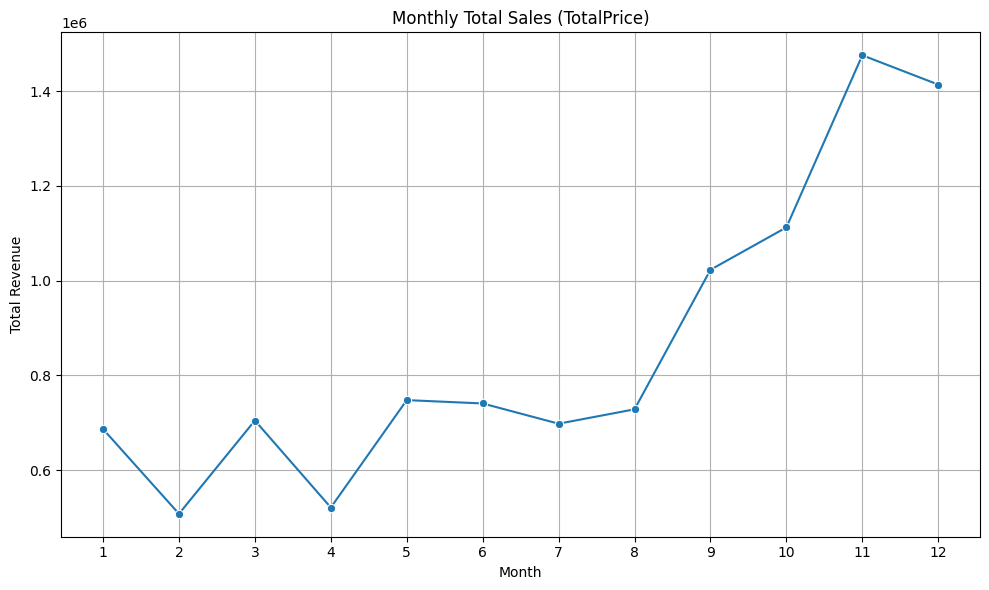

In [52]:
# Group by Month
monthly_sales = df.groupby('Month')['TotalPrice'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', marker='o')
plt.title("Monthly Total Sales (TotalPrice)")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(1,13))
plt.grid(True)
plt.tight_layout()
plt.show()


📈 **Monthly Total Sales (TotalPrice)**

- 🔁 **Seasonal pattern**: Higher sales in the second half of the year
- 📉 **Lowest**: February (~500K), April also low
- ➖ **Flat mid-year**: May–August (~700–750K)
- 📈 **Rapid growth**: September to November
- 🏆 **Peak**: November (~1.4M+), slight dip in December but still high
- 📊 **Overall trend**: Strong year-end surge, likely due to holidays/promotions


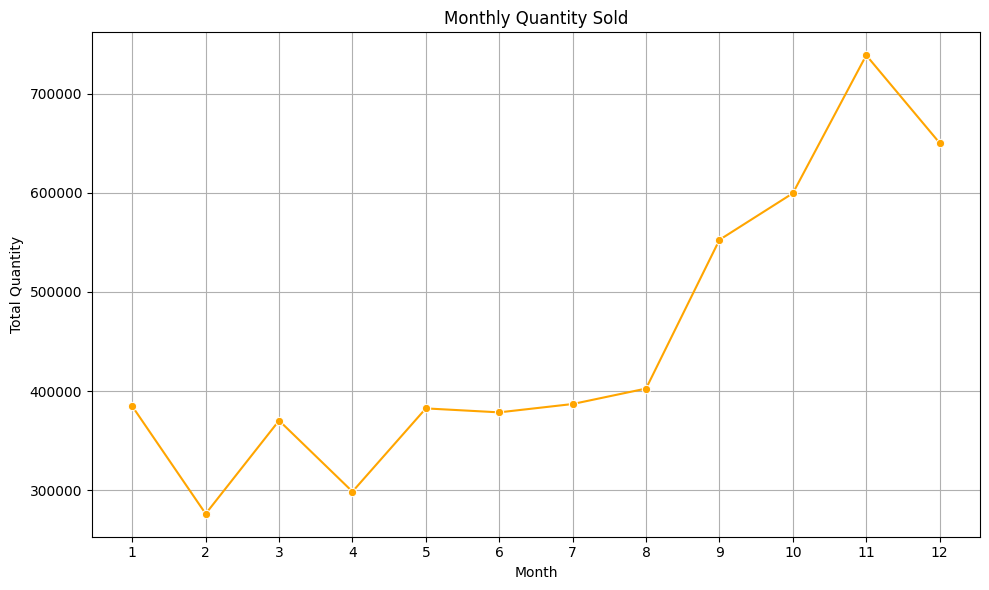

In [53]:
# Group by Month
monthly_quantity = df.groupby('Month')['Quantity'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_quantity, x='Month', y='Quantity', marker='o', color='orange')
plt.title("Monthly Quantity Sold")
plt.xlabel("Month")
plt.ylabel("Total Quantity")
plt.xticks(range(1,13))
plt.grid(True)
plt.tight_layout()
plt.show()


📦 **Monthly Quantity Sold**

- 🔁 **Seasonal pattern**: Strong increase in later months
- 📉 **Lowest**: February (~300K)
- ➖ **Stable**: May–August (~400K)
- 📈 **Sharp rise**: Starts in September, peaks in **November** (~700K+)
- 📉 **Small dip**: December (~600K+), still high
- 🔗 **Matches sales trend**: Revenue growth mainly driven by more items sold, not higher prices


### StockCode / Description vs. UnitPrice / Quantity / TotalPrice:

In [54]:
# Group by Description (or StockCode)
product_stats = df.groupby('Description').agg({
    'UnitPrice': 'mean',
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

# Drop missing descriptions if any
product_stats = product_stats.dropna(subset=['Description'])

# Sort by total sales to find Top N
top_n = product_stats.sort_values(by='TotalPrice', ascending=False).head(10)


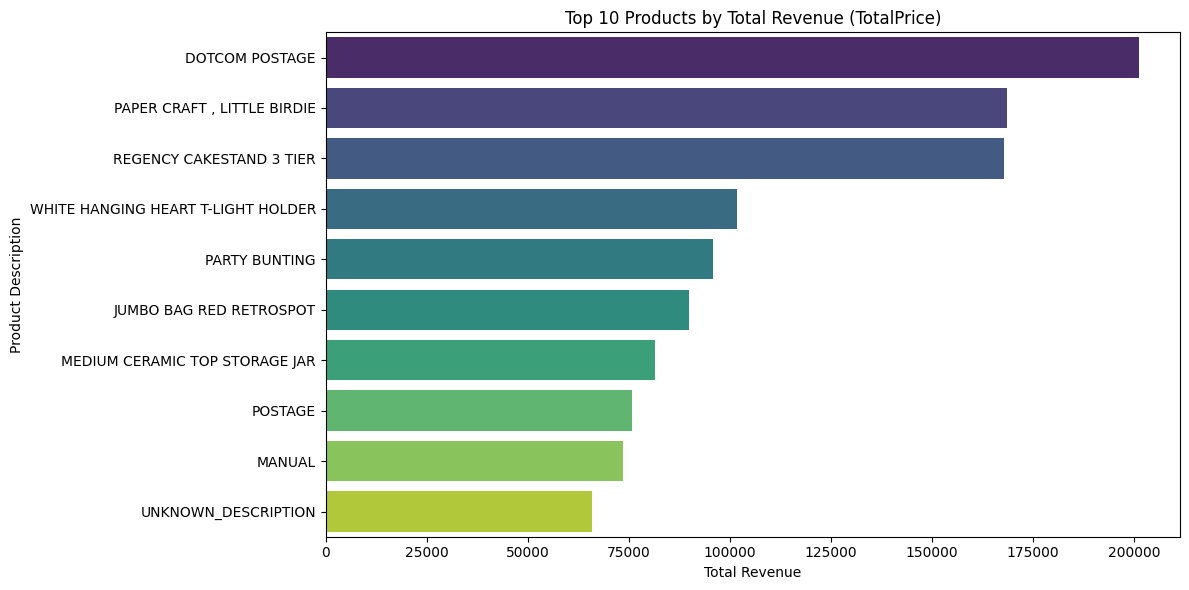

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_n, x='TotalPrice', y='Description', palette='viridis',hue='Description',legend=False)
plt.title('Top 10 Products by Total Revenue (TotalPrice)')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


🏆 **Top 10 Products by Revenue**

- 💰 **Top earner**: *DOTCOM POSTAGE* (~200K)
- 📊 **Top 3 standout**: All above 150K (includes *LITTLE BIRDIE*, *REGENCY CAKESTAND*)
- 📉 **Big drop after 3rd**: 4th place ~100K (only ⅔ of 3rd)
- 📦 **Gradual decline**: 10th product ~75K (*UNKNOWN_DESCRIPTION*)
- 🚚 **Postage matters**: *DOTCOM POSTAGE* & *POSTAGE* both in top 10
- ⚠️ **Data issue**: *UNKNOWN_DESCRIPTION* shows missing labels still bring high revenue


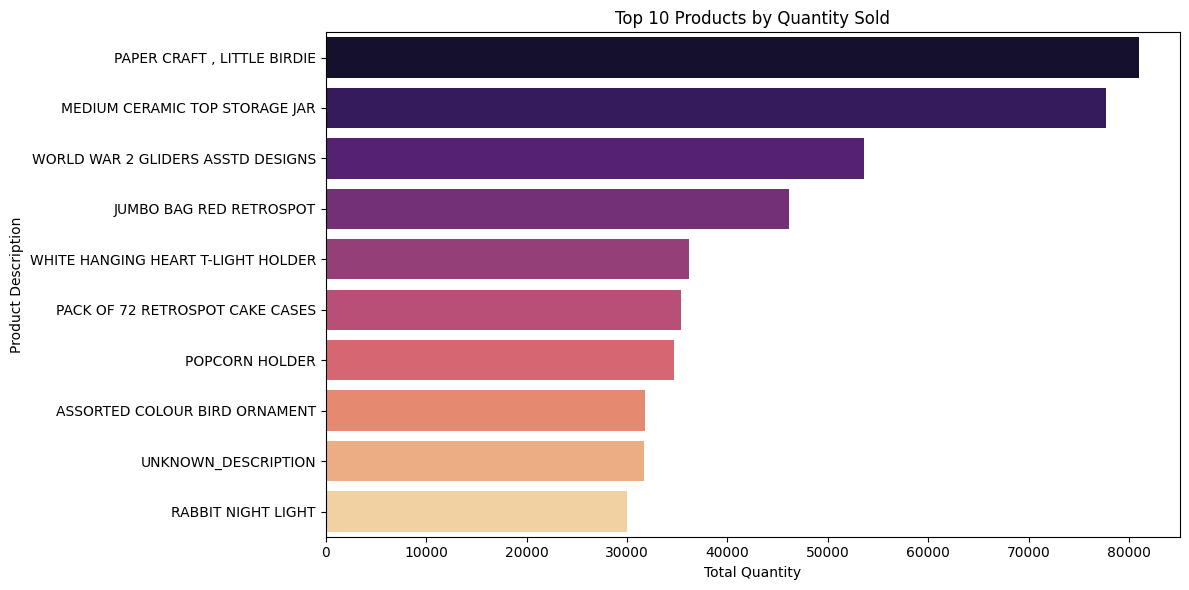

In [56]:
top_qty = product_stats.sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_qty, x='Quantity', y='Description', palette='magma',hue='Description',legend=False)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


📦 **Top 10 Products by Quantity Sold**

- 🥇 *LITTLE BIRDIE* leads with ~80K units
- 🏺 *CERAMIC JAR* (~75K) & ✈️ *WW2 GLIDERS* (~55K) follow
- 📉 Big drop after top 3; 4th product <50K
- ⚠️ *UNKNOWN_DESCRIPTION* sold >30K units — data quality concern
- 💡 **Revenue ≠ Quantity**: 
  - *DOTCOM POSTAGE* (top revenue) isn’t in top quantity
  - *LITTLE BIRDIE* ranks high in both → strong performer
  - High volume ≠ high price (e.g., *GLIDERS*, *CERAMIC JAR*)


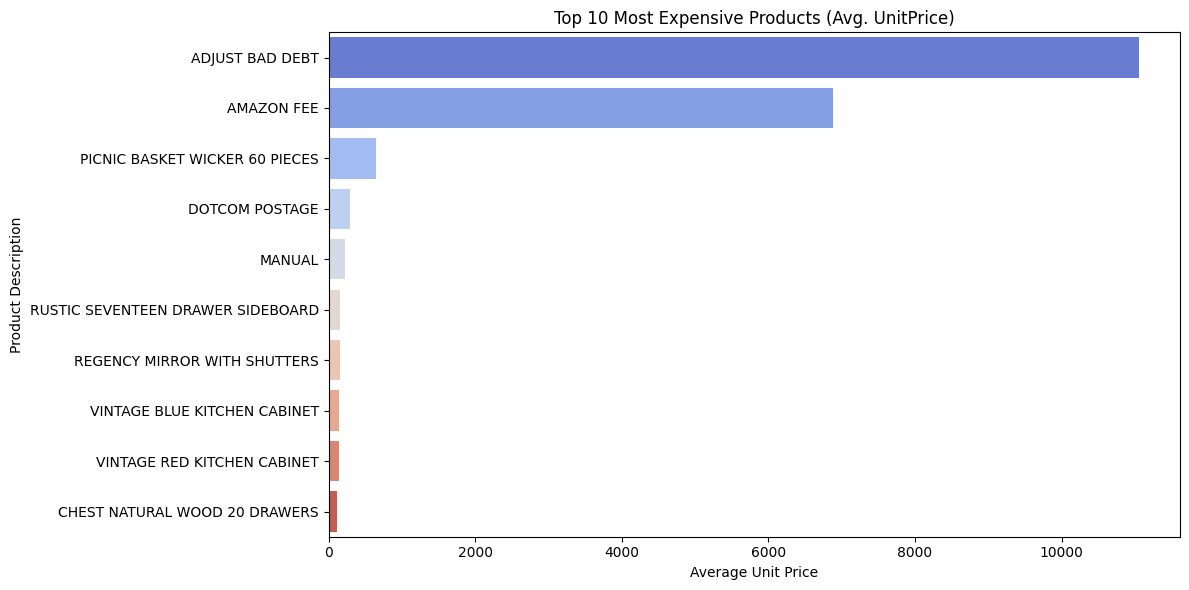

In [57]:
top_price = product_stats.sort_values(by='UnitPrice', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_price, x='UnitPrice', y='Description', palette='coolwarm',hue='Description',legend=False)
plt.title('Top 10 Most Expensive Products (Avg. UnitPrice)')
plt.xlabel('Average Unit Price')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


💰 **Top 10 Most Expensive Products (Avg. UnitPrice)**

- ⚠️ *ADJUST BAD DEBT* (~₹10K) & *AMAZON FEE* (~₹6K) top the list — not actual products, likely fees or adjustments.
- 📉 Huge price drop after these two; next is *PICNIC BASKET (60 pcs)* (~₹1K) — the priciest real product.
- 🪑 Other tangible items: *SIDEBOARD*, *MIRROR*, *CABINETS* — all priced between ₹200–₹1K.
- 🧾 *DOTCOM POSTAGE* & *MANUAL* also appear — again, likely non-product charges.
- 🎯 Most real high-price products are bulky/furniture-like — clustered in the ₹200–₹1K range.


## 2.3. Categorical vs. Categorical Relationships

### Country vs. IsCanceled

<Figure size 800x500 with 0 Axes>

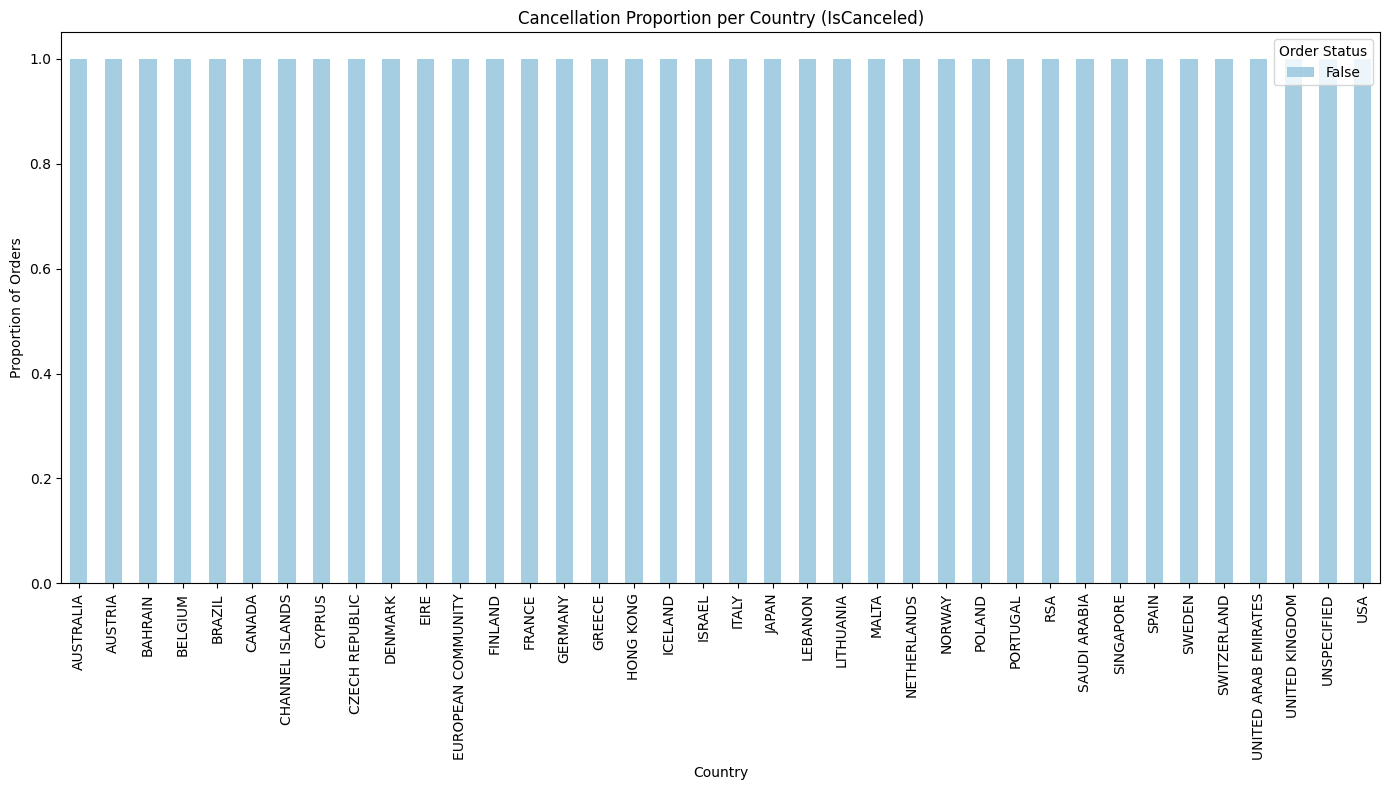

In [58]:
# Step 1: Group and count
country_cancel_counts = df.groupby(['Country', 'IsCanceled']).size().reset_index(name='Count')

# Step 2: Pivot
country_cancel_pivot = country_cancel_counts.pivot(index='Country', columns='IsCanceled', values='Count').fillna(0)

# Optional: Rename columns to avoid numeric indexing issues
country_cancel_pivot.columns = ['NotCanceled', 'Canceled'] if set([0,1]).issubset(country_cancel_pivot.columns) else list(country_cancel_pivot.columns)

# Step 3: Normalize to get proportion
country_cancel_pivot_percent = country_cancel_pivot.div(country_cancel_pivot.sum(axis=1), axis=0)

# Step 4: Sort by Canceled rate (if column exists)
if 'Canceled' in country_cancel_pivot_percent.columns:
    country_cancel_pivot_percent = country_cancel_pivot_percent.sort_values(by='Canceled', ascending=False)

# Step 5: Plot
plt.figure(figsize=(8, 5))
country_cancel_pivot_percent.plot(kind='bar', stacked=True, colormap='Paired', figsize=(14, 8))

plt.title('Cancellation Proportion per Country (IsCanceled)')
plt.xlabel('Country')
plt.ylabel('Proportion of Orders')
plt.legend(title='Order Status')
plt.tight_layout()
plt.show()


 **Cancellation Proportion per Country**

-  Only shows *non-canceled* (IsCanceled = False) orders — no data for canceled ones.
-  Chart is misleading — suggests cancellation analysis but hides cancellation info.
-  Proportion = 1.0 for every country → no insight into actual cancellation rates.
-  Possible issue: canceled orders may be missing or filtered from the data.


### Month (Derived) vs. Country

<Figure size 1600x800 with 0 Axes>

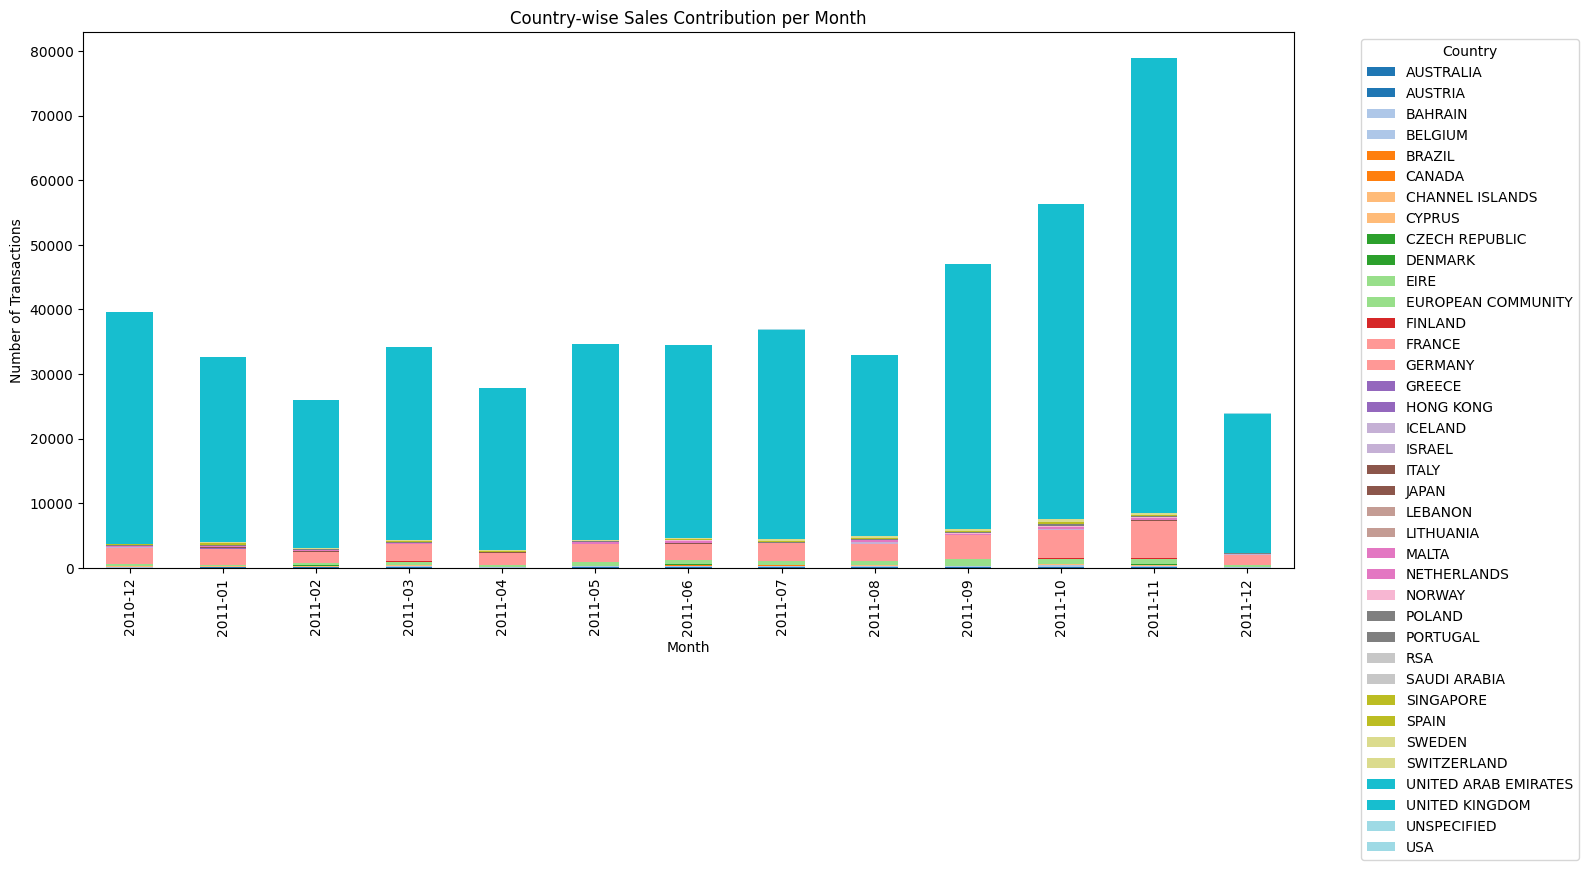

In [59]:
# Make sure 'InvoiceDate' is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Derive 'Month' from 'InvoiceDate'
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str)

# Step 1: Group by Month and Country — count number of transactions (or use TotalPrice if preferred)
month_country_counts = df.groupby(['Month', 'Country']).size().unstack(fill_value=0)

# Optional: Sort months chronologically
month_country_counts = month_country_counts.sort_index()

# Step 2: Plot — Stacked Bar Chart
plt.figure(figsize=(16, 8))
month_country_counts.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')

plt.title('Country-wise Sales Contribution per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Country-wise Sales Contribution (Monthly)**

- UK Dominates: Over 90% of monthly transactions come from the UK.
- Seasonal Pattern: UK sales dip early in 2011, peak in November.
- Others Contribute Minimally: Non-UK countries form a tiny base in each bar.
- Stable Shares: Other countries show consistent, low contributions monthly.
- Long Tail Effect: Many countries, but most have negligible impact compared to the UK.


### DayOfWeek (Derived) vs. IsCanceled

<Figure size 1200x600 with 0 Axes>

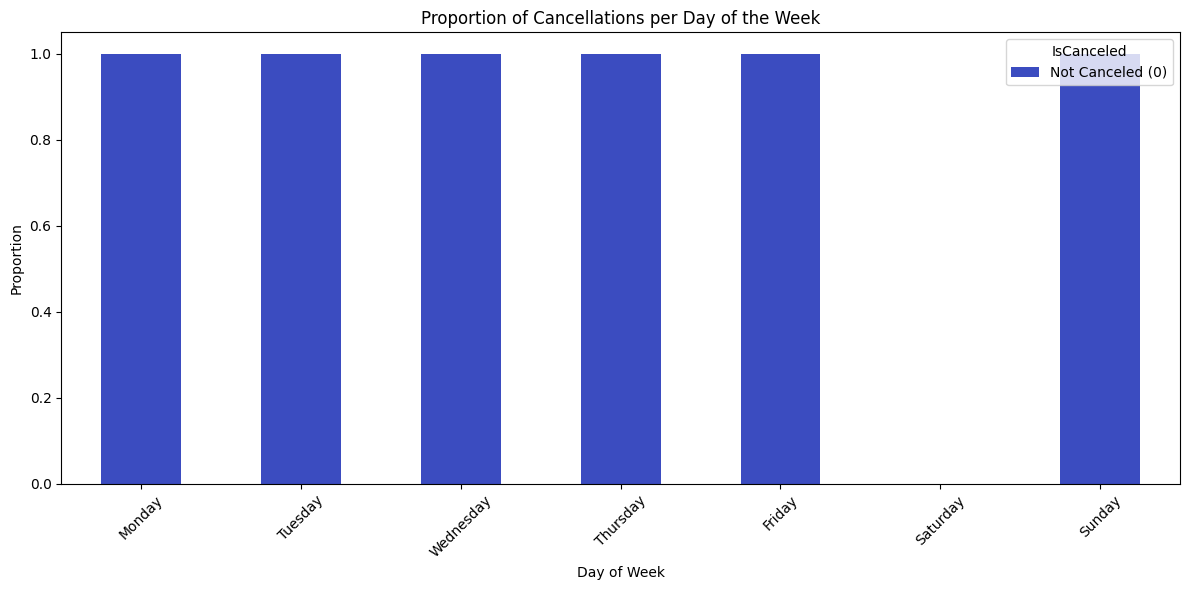

In [60]:
# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Derive 'DayOfWeek' (0 = Monday, 6 = Sunday) and get weekday name
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Step 1: Create pivot table — count of cancellations and non-cancellations per weekday
day_cancel_pivot = df.groupby(['DayOfWeek', 'IsCanceled']).size().unstack(fill_value=0)

# Optional: reorder days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_cancel_pivot = day_cancel_pivot.reindex(ordered_days)

# Step 2: Normalize for proportion
day_cancel_percent = day_cancel_pivot.div(day_cancel_pivot.sum(axis=1), axis=0)

# Step 3: Plot — Stacked Bar Chart
plt.figure(figsize=(12, 6))
day_cancel_percent.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))

plt.title('Proportion of Cancellations per Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Proportion')
plt.legend(title='IsCanceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Proportion of Cancellations by Day of Week – Insights**

- **Only Non-Canceled Orders Shown:** All bars represent 100% non-canceled transactions; no canceled data is visualized.
- **Misleading Chart Title:** Despite the title, the chart does not show any proportion of actual cancellations.
- **No Comparative Insight:** Cannot determine which days had higher or lower cancellation rates.
- **Missing Data for Saturday:** No bar for Saturday; aligns with other charts showing no sales that day.
- **Possible Data or Query Issue:** Canceled transactions may have been filtered out or mishandled during plotting.


# Multivariate Analysis

### Time Series with Multiple Categories

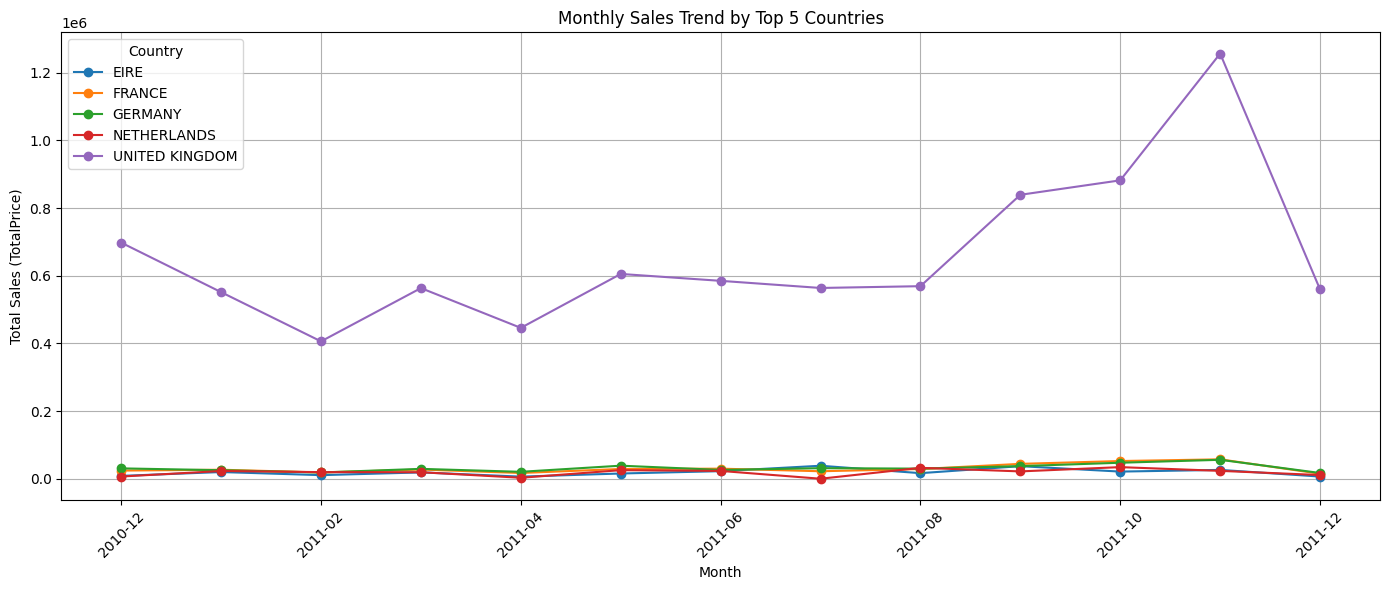

In [61]:
# Ensure datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Derive Month
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str)

# Get Top 5 countries by total sales
top_countries = df.groupby('Country')['TotalPrice'].sum().nlargest(5).index

# Filter for only top countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Group by Month and Country
monthly_sales_country = df_top_countries.groupby(['Month', 'Country'])['TotalPrice'].sum().reset_index()

# Pivot for line plot
pivot_country = monthly_sales_country.pivot(index='Month', columns='Country', values='TotalPrice')

# Plot
pivot_country.plot(figsize=(14, 6), marker='o')
plt.title('Monthly Sales Trend by Top 5 Countries')
plt.xlabel('Month')
plt.ylabel('Total Sales (TotalPrice)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


Monthly Sales Trend – Key Insights :

UK dominates sales with clear seasonal peaks, especially in Nov 2011.

Other top countries (France, Germany, EIRE, Netherlands) show low, flat sales.

Overall sales trend is almost entirely driven by the UK.

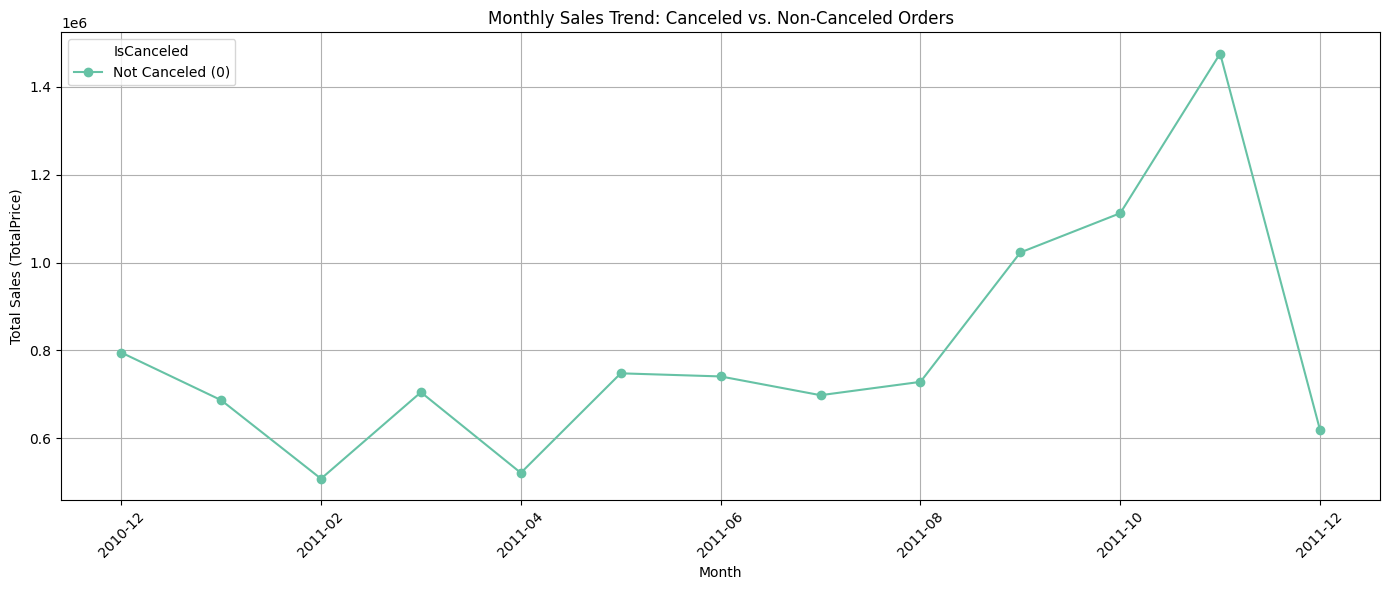

In [62]:
# Group by Month and IsCanceled
monthly_sales_cancel = df.groupby(['Month', 'IsCanceled'])['TotalPrice'].sum().reset_index()

# Pivot for line plot
pivot_cancel = monthly_sales_cancel.pivot(index='Month', columns='IsCanceled', values='TotalPrice')

# Plot
pivot_cancel.plot(figsize=(14, 6), marker='o', colormap='Set2')
plt.title('Monthly Sales Trend: Canceled vs. Non-Canceled Orders')
plt.xlabel('Month')
plt.ylabel('Total Sales (TotalPrice)')
plt.xticks(rotation=45)
plt.legend(title='IsCanceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 Sales & Customer Insights (Summary)

#### 🔹 1. Sales Trends
- **10x growth** from 2010 (~$1M) to 2011 (~$10M).
- **Seasonal peak** in **Nov-Dec**, lowest in **Feb-Apr**.
- **Weekdays high**, esp. **Tue & Thu**. No sales on **Sat**, very few on **Sun**.
- **Sales peak: 10 AM–3 PM**, drop after.
- **Non-canceled sales** follow same seasonal pattern.

#### 🔹 2. Customer & Product Insights
- **"UNKNOWN_CUSTOMER"** has highest spend → **data issue**.
- Most products priced around **$2**, a few high-price outliers.
- **Top by Revenue:** 
  - `DOTCOM POSTAGE`, `PAPER CRAFT, LITTLE BIRDIE`
- **Top by Quantity:** 
  - `PAPER CRAFT, LITTLE BIRDIE`, `STORAGE JAR`
- **Most expensive item:** `PICNIC BASKET WICKER (60 PCS)`

#### 🔹 3. Geographic Insights
- **UK leads** in sales and transactions.
- **Australia & Netherlands** have **larger avg. orders**.
- **Cancellation graphs misleading** — show only non-canceled %.



### Customer Segmentation:

In [63]:
# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Latest purchase date in dataset
latest_date = df['InvoiceDate'].max()

# Group by Customer
customer_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                  # Frequency
    'TotalPrice': 'sum',                                     # Monetary
    'Country': 'first'                                       # Country for coloring
}).reset_index()

# Rename columns
customer_df.columns = ['CustomerID', 'Recency', 'NumOrders', 'TotalSpend', 'Country']


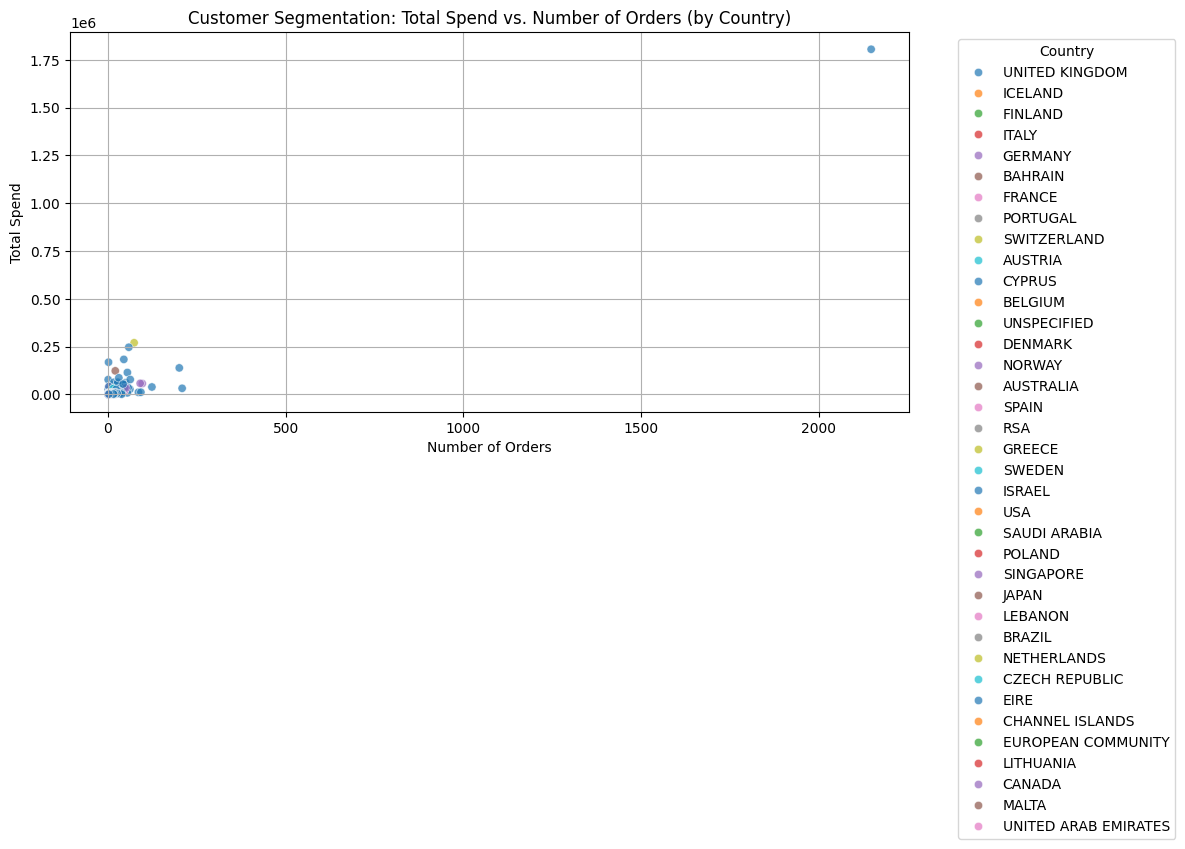

In [64]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=customer_df,
    x='NumOrders',
    y='TotalSpend',
    hue='Country',
    palette='tab10',
    alpha=0.7
)
plt.title('Customer Segmentation: Total Spend vs. Number of Orders (by Country)')
plt.xlabel('Number of Orders')
plt.ylabel('Total Spend')
plt.legend(bbox_to_anchor=(1.05, 1), title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


### Product Performance Across Dimensions:

In [65]:
product_quantity_pivot = df.pivot_table(
    index='StockCode',
    columns='Country',
    values='Quantity',
    aggfunc='mean'
)

product_quantity_pivot = df.pivot_table(
    index='StockCode',
    columns='Country',
    values='Quantity',
    aggfunc='mean'
)


# Optional: Keep only top 20 products and top 10 countries by sales
top_products = df['StockCode'].value_counts().head(20).index
top_countries = df['Country'].value_counts().head(10).index

filtered_df = df[df['StockCode'].isin(top_products) & df['Country'].isin(top_countries)]

pivot = filtered_df.pivot_table(
    index='StockCode',
    columns='Country',
    values='Quantity',  # or 'UnitPrice'
    aggfunc='mean'
)


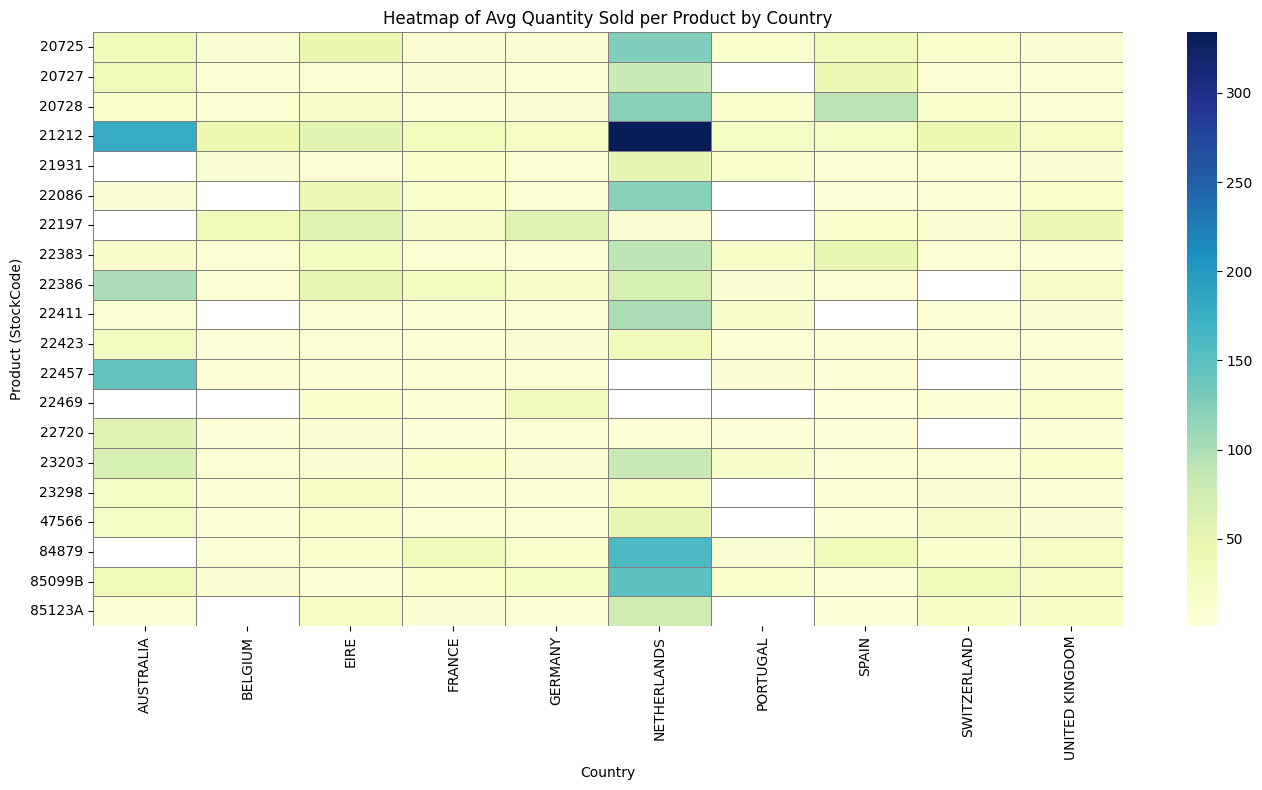

In [66]:
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Avg Quantity Sold per Product by Country')
plt.xlabel('Country')
plt.ylabel('Product (StockCode)')
plt.tight_layout()
plt.show()
